<h1><center>Best job application season for the 3 most in demand industries </center></h1>

In [71]:
import awscli
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import seaborn as sns
matplotlib.rcParams['figure.dpi']=200

In [2]:
df = pd.read_csv('temp_datalab_records_linkedin_company.csv')
df.shape
#shape 

/Users/sayebms1/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2426196, 14)

### Lets look at the table

In [3]:
# df.tail(10)

### we see that there are 3 NaN columns so let's drop them

In [4]:
print (df.shape)
df.drop(columns=['description', 'entity_id', 'cusip', 'isin'], inplace=True)

(2426196, 14)


### There are 3 columns that indicate the dates, lets put them all in the same format 

In [5]:
df['date_added']=pd.to_datetime(df['date_added']).dt.date
df['date_updated']=pd.to_datetime(df['date_updated']).dt.date
df['as_of_date']=pd.to_datetime(df['as_of_date']).dt.date

### Check if all the columns date_updated and date_added are the same

In [6]:
print (np.where((df['date_added']==df['date_updated'])==False)[0].shape)

(10,)


### let's check some of these values

In [7]:
df.loc[2421904]

dataset_id                                                 58972
as_of_date                                            2018-07-16
company_name                  Domino's Pizza Enterprises Limited
followers_count                                            10437
employees_on_platform                                       2718
link                     https://www.linkedin.com/company/780297
industry                                                  Retail
date_added                                            2018-07-16
date_updated                                          2018-07-17
website                                http://www.dominos.com.au
Name: 2421904, dtype: object

#### There are only 10 job postings that have an updated date that is different from the date added. Also, the updated date only differs from the date added by one day only. The updated date doesn't really give us any substantial information, therefore we can drop it from the table. 

In [8]:
df.drop(columns=['date_updated'], inplace=True)

#### But before doing that let's also check if tehre is a difference between date_added and date_updated. In first glace they also look the same

In [9]:
print (np.where((pd.to_datetime(df['date_added']).dt.year==pd.to_datetime(df['as_of_date']).dt.year)==False)[0])

[1713590 1713591 1713601 ... 1997511 1997534 1997544]


In [10]:
df.loc[1713590]

dataset_id                                                2139065
as_of_date                                             2018-01-13
company_name                                Masco Construction Co
followers_count                                                12
employees_on_platform                                           8
link                     https://www.linkedin.com/company/4444981
industry                                             Construction
date_added                                             2017-01-13
website                                                       NaN
Name: 1713590, dtype: object

In [11]:
df.reset_index(inplace=True)

In [12]:
df_grouped = df.groupby(['industry']).sum()

In [13]:
df.columns
df.drop(columns=['dataset_id', 'as_of_date', 'website', 'link', 'index'], inplace=True)
df.reset_index(inplace=True)
df.columns

Index(['index', 'company_name', 'followers_count', 'employees_on_platform',
       'industry', 'date_added'],
      dtype='object')

In [14]:
df.head(10)

,index,company_name,followers_count,employees_on_platform,industry,date_added
0,0,Goldman Sachs,552254,38124,Investment Banking,2015-09-14
1,1,Goldman Sachs,552862,38141,Investment Banking,2015-09-15
2,2,United Technologies,59157,14982,Aviation & Aerospace,2015-09-16
3,3,Novo Nordisk,336175,26448,Pharmaceuticals,2015-09-16
4,4,"Lowe's Companies, Inc.",134255,62574,Retail,2015-09-16
5,5,UnitedHealth Group,221288,77108,Hospital & Health Care,2015-09-16
6,6,McKesson,128090,17520,Hospital & Health Care,2015-09-16
7,7,BBVA,109420,40933,Banking,2015-09-16
8,8,IBM,2542182,414139,Information Technology and Services,2015-09-16
9,9,MasterCard,147619,9658,Information Technology and Services,2015-09-16


In [15]:
df['year'] = pd.to_datetime(df['date_added']).dt.year
df['month'] = pd.to_datetime(df['date_added']).dt.month

In [16]:
#find hottest jobs 
df.drop (columns=['date_added','index'], inplace=True)
df.tail(100)

,company_name,followers_count,employees_on_platform,industry,year,month
2426096,Videojet Technologies,16465,2344,Printing,2018,7
2426097,Federated National Insurance Company,995,124,Insurance,2018,7
2426098,Central Garden & Pet,8762,1505,Consumer Goods,2018,7
2426099,BASi,2172,235,Pharmaceuticals,2018,7
2426100,Pilgrim's,15793,3740,Food Production,2018,7
...,...,...,...,...,...,...
2426191,"Diversified Restaurant Holdings, Inc (Nasdaq: ...",488,89,Restaurants,2018,7
2426192,First Financial Northwest Bank,785,118,Banking,2018,7
2426193,DMC Global Inc.,1521,184,Oil & Energy,2018,7
2426194,ServiceSource,27963,2496,Information Technology and Services,2018,7


In [17]:
grouped_by_industry = df.groupby(['industry']).count().drop(columns=['year', 'month', 'employees_on_platform','followers_count'])
grouped_by_industry.rename(columns = {'company_name':'Count'}, inplace = True)

In [18]:
grouped_by_industry.sort_values(['Count'], ascending=False, axis=0, inplace=True )
grouped_by_industry.head()

,Count
industry,
Banking,168364
Biotechnology,152710
Financial Services,148143
Oil & Energy,116830
Retail,95384


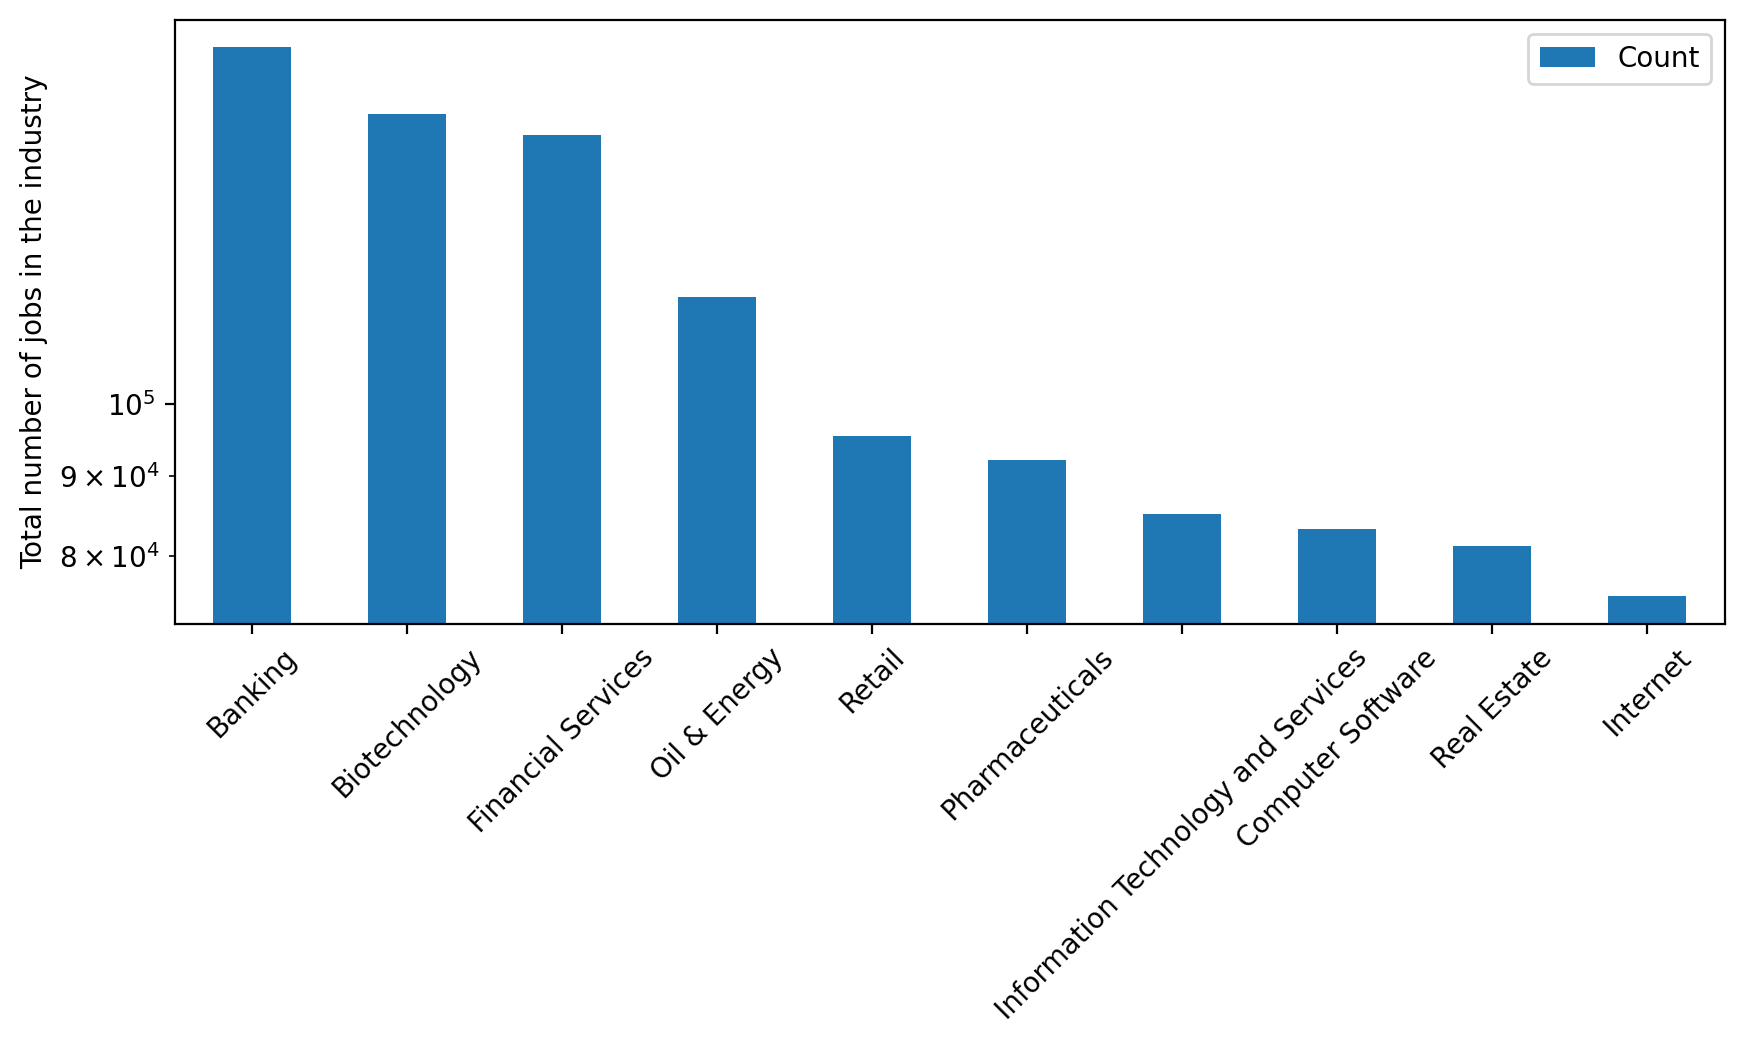

In [33]:

ax=grouped_by_industry.head(10).plot(kind='bar', 
                            figsize=(10,4),
#                             color = ['#5cb85c', '#5bc0de',  '#d9534f']
                            )
ax.set_yscale('log')
ax.set_ylabel('Total number of jobs in the industry')
ax.set_xlabel('')
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)

### From this plot we see that the top 3 industries with the most number of job opennings are Banking, Biotechnology, and Financial Services 

In [81]:
# # df['industry'].unique()
# # !mkdir images
# fig = ax.get_figure()
# fig.savefig('./images/in_demand_industries.png')
df.head()

,company_name,followers_count,employees_on_platform,industry,year,month
0,Goldman Sachs,552254,38124,Investment Banking,2015,9
1,Goldman Sachs,552862,38141,Investment Banking,2015,9
2,United Technologies,59157,14982,Aviation & Aerospace,2015,9
3,Novo Nordisk,336175,26448,Pharmaceuticals,2015,9
4,"Lowe's Companies, Inc.",134255,62574,Retail,2015,9


In [89]:
df[df.isnull().any(axis=1)]
df['industry'].fillna('Unknown', inplace=True)
df[df.isnull().any(axis=1)]

,company_name,followers_count,employees_on_platform,industry,year,month


In [128]:
#group by industry and by years
grouped_indust_years = df.groupby(['industry','year']).count().drop(columns=['followers_count','employees_on_platform','company_name'])
grouped_indust_years.rename(columns = {'month':'count'}, inplace = True)
# grouped_indust_years.reset_index(inplace=True)
grouped_indust_years.head()


count
industry          year       
Accounting        2016    248
                  2017   1003
                  2018    302
Airlines/Aviation 2015    881
                  2016   3636

In [133]:
top3_ordered_group = grouped_indust_years.reindex( ['Banking','Biotechnology','Financial Services'], level = 'industry')

In [127]:
print (grouped_indust_years[grouped_indust_years['industry']=='Banking'])
print (grouped_indust_years.keys())

   industry  year  count
23  Banking  2015   1305
24  Banking  2016  14301
25  Banking  2017  97591
26  Banking  2018  55167
Index(['industry', 'year', 'count'], dtype='object')


In [136]:
top3_ordered_group.reset_index(inplace=True)


In [143]:
top3 = ['Banking','Biotechnology','Financial Services']

In [166]:
top3_arr = np.array(top3_ordered_group)
banking = np.array(top3_arr[0:4])
biotech = np.array(top3_arr[4:8])
finance = np.array(top3_arr[8:])
print (banking)
print (biotech)
print (finance)

[['Banking' 2015 1305]
 ['Banking' 2016 14301]
 ['Banking' 2017 97591]
 ['Banking' 2018 55167]]
[['Biotechnology' 2015 1989]
 ['Biotechnology' 2016 11117]
 ['Biotechnology' 2017 83713]
 ['Biotechnology' 2018 55891]]
[['Financial Services' 2015 5402]
 ['Financial Services' 2016 23418]
 ['Financial Services' 2017 76241]
 ['Financial Services' 2018 43082]]


In [169]:
banking = banking[:,1:]
biotech = biotech[:,1:]
finance = finance[:,1:]

In [170]:
print (banking)
print (biotech)
print (finance)

[[2015 1305]
 [2016 14301]
 [2017 97591]
 [2018 55167]]
[[2015 1989]
 [2016 11117]
 [2017 83713]
 [2018 55891]]
[[2015 5402]
 [2016 23418]
 [2017 76241]
 [2018 43082]]


In [175]:
# import matplotlib.pyplot as plt
# plt.plot(banking[:,0], banking[:,1])

In [177]:
# sns.lineplot( top3_ordered_group)

In [176]:
# top3 = ['Banking','Biotechnology','Financial Services']
# # filtered_df = grouped_indust_years.where(df['industry']==top3)
# filtere_df.head()

In [179]:
# grouped_by_month =
grouped_by_month = df.groupby(['month','year']).count().drop(columns=['followers_count','employees_on_platform','industry'])
grouped_by_month.rename(columns = {'company_name':'Count'}, inplace = True)
# grouped_by_month.reset_index(inplace=True)
# grouped_by_month.rename(columns = {'company_name':'Count'}, inplace = True)
grouped_by_month

Count
month year        
1     2016   18675
      2017   98199
      2018  122000
2     2016   17187
      2017   90044
      2018  102899
3     2016   19349
      2017   93718
      2018  114345
4     2016   20388
      2017   94566
      2018  110835
5     2016   21552
      2017   99024
      2018  114895
6     2016   20129
      2017  100648
      2018  109797
7     2016   22069
      2017  109782
      2018   63651
8     2016   22815
      2017  112113
9     2015    6884
      2016   39291
      2017  104907
10    2015   16263
      2016   45217
      2017  112279
11    2015   17019
      2016   48123
      2017  118521
12    2015   17620
      2016   65838
      2017  135554

In [ ]:
sns.plot()

In [68]:
grouped_by_month.describe()

,Count
count,35.000000
mean,69319.885714
std,42869.774036
min,6884.000000
25%,20970.000000
50%,90044.000000
75%,109789.500000
max,135554.000000


In [181]:
print (grouped_by_month.head())
grouped_by_month.reset_index(inplace=True)
print (grouped_by_month.head())

             Count
month year        
1     2016   18675
      2017   98199
      2018  122000
2     2016   17187
      2017   90044
   month  year   Count
0      1  2016   18675
1      1  2017   98199
2      1  2018  122000
3      2  2016   17187
4      2  2017   90044


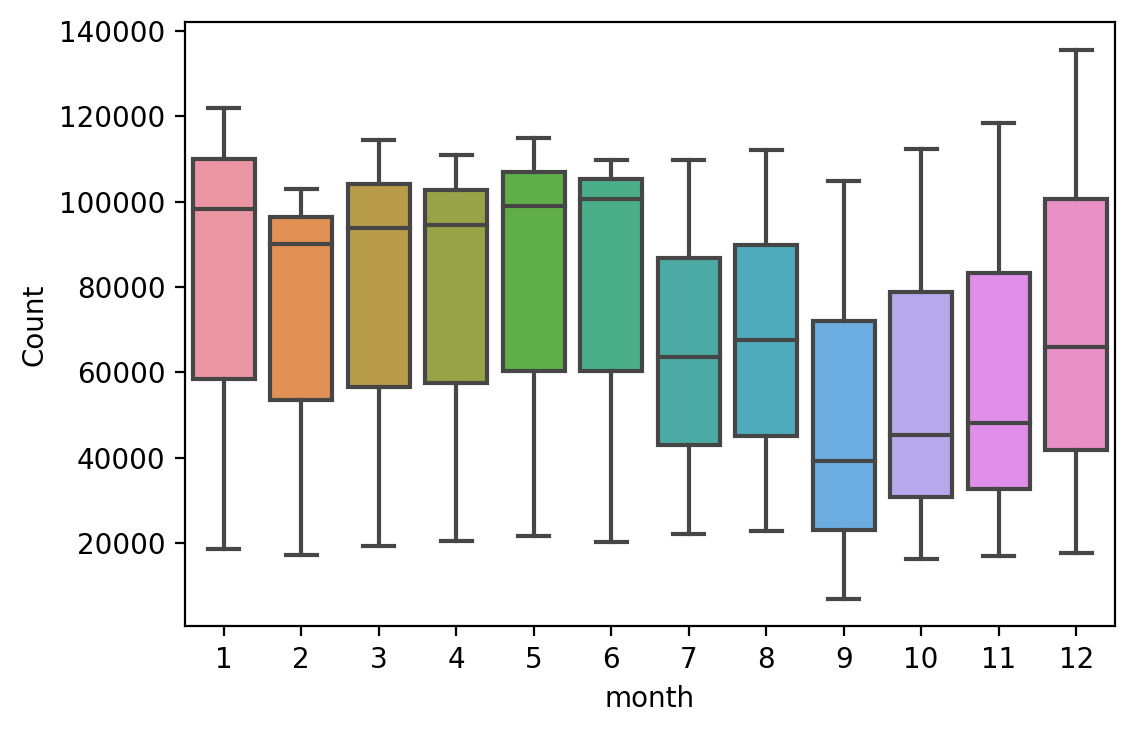

In [182]:
ax1 = sns.boxplot(x=grouped_by_month['month'], y = grouped_by_month['Count'])

### This initial analysis shoes that January has the highest number of job postings with december having the least. the next step would be to look at the jobs with the highest number of highring and how their job opennings change monthly. It might be also better to look at the quarterly changes instead of monthly changes.

In [184]:
fig1 = ax1.get_figure()
fig1.savefig('./images/monthly_job_opennings.png')

In [63]:
years = df['year'].unique()
years

array([2015, 2016, 2017, 2018])

In [ ]:
df_CI = df_can.loc[['China','India'],years].transpose()

In [ ]:
df_months = df.loc[]

In [185]:

# ax=df.groupby(['month','year']).plot(kind='box', 
#                             figsize=(20,8),
#                             #color = ['#5cb85c', '#5bc0de',  '#d9534f']
#                             )
# # ax.set_yscale('log')
# # ax.set_ylabel('Total number of jobs in the industry')